In [ ]:
'''
 * Copyright (c) 2016 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

# Statistical Learning

The purpose of this chapter is to introduce the reader to common concepts and themes in statistical learning. We discuss the difference between supervised and unsupervised learning, and how to assess the predictive performance of supervised learning. We also examine the central role that linear and Gaussian properties play in data modeling. The chapter concludes with a section on Bayesian learning. The required probability and statistics background is provided in Appendix C.

## 2.1 Introduction

Although structuring and visualizing data are important aspects of data science, the main challenge lies in the mathematical analysis of the data. When the goal is to interpret the model and quantify uncertainty in the data, this analysis is referred to as $ statistical learning $. In contrast, when the emphasis is on making predictions using large-scale statistical data, it is common to speak of $ machine learning $ or $ data mining $.

There are two major goals for modeling data:
1. To accurately predict a future quantity of interest given observed data.
2. To discover unusual or interesting patterns in the data.

To achieve these goals, one must rely on three important pillars of the mathematical sciences:

- $ Function Approximation $: Building a mathematical model for data involves understanding how one variable depends on another. This relationship is represented via a mathematical function or map, which is assumed to be partially unknown but approximable with sufficient computing power and data. Data scientists must determine the best way to approximate and represent functions using minimal processing and memory.

- $ Optimization $: Given a class of mathematical models, the task is to find the best model within that class. This requires an efficient search or optimization procedure, viewed as fitting or calibrating a function to observed data. This step necessitates knowledge of optimization algorithms and efficient programming.

- $ Probability and Statistics $: Data used to fit models is typically a realization of a random process or numerical vector, with a probability law determining prediction accuracy. To quantify uncertainty in future predictions and model errors, data scientists need a solid understanding of probability theory and statistical inference.

## 2.2 Supervised and Unsupervised Learning

Given an input or $ feature vector $ $ x $, one of the main goals of machine learning is to predict an output or $ response variable $ $ y $. For example, $ x $ could be a digitized signature, and $ y $ a binary variable indicating whether the signature is genuine or false. Another example is where $ x $ represents the weight and smoking habits of an expecting mother, and $ y $ the birth weight of the baby. This prediction attempt is encoded in a mathematical $ prediction function $ $ g $, which takes $ x $ as input and outputs a guess $ \hat{y} $ for $ y $ (e.g., $ \hat{y} = g(x) $). In a sense, $ g $ encompasses all information about the relationship between $ x $ and $ y $, excluding the effects of chance and randomness in nature.

### Regression and Classification

- In $ regression $ problems, the response variable $ y $ can take any real value.
- In contrast, when $ y $ can only lie in a finite set, say $ y \in \{0, \ldots, c-1\} $, predicting $ y $ is conceptually the same as classifying the input $ x $ into one of $ c $ categories, making it a $ classification $ problem.

We can measure the accuracy of a prediction $ \hat{y} $ with respect to a given response $ y $ using a $ loss function $ $ \text{Loss}(y, \hat{y}) $.

- In a regression setting, the usual choice is the $ squared-error loss $:

$$
\text{Loss}(y, \hat{y}) = (y - \hat{y})^2. \tag{2.2}
$$

- In the case of classification, the $ zero-one (0-1) loss function $ is often used:

$$
\text{Loss}(y, \hat{y}) = 1_{\{y \neq \hat{y}\}}, \tag{2.3}
$$

which incurs a loss of 1 whenever the predicted class $ \hat{y} $ is not equal to the true class $ y $, where $ 1_{\{y \neq \hat{y}\}} $ is the indicator function (1 if $ y \neq \hat{y} $, 0 otherwise). Later in this book, we will encounter other useful loss functions, such as the cross-entropy and hinge loss functions (see, e.g., Chapter 7).

The term $ error $ is often used as a measure of distance between a "true" object $ y $ and its approximation $ \hat{y} $. If $ y $ is real-valued, the $ absolute error $ $ |y - \hat{y}| $ and the $ squared error $ $ (y - \hat{y})^2 $ are well-established concepts. For vectors, the norm $ \|y - \hat{y}\| $ and squared norm $ \|y - \hat{y}\|^2 $ are used. The squared error $ (y - \hat{y})^2 $ is one example of a loss function.

It is unlikely that any mathematical function $ g $ will make accurate predictions for all possible pairs $ (x, y) $ encountered in nature. One reason is that, even with the same input $ x $, the output $ y $ may vary due to chance circumstances or randomness. To address this, we adopt a probabilistic approach, assuming each pair $ (x, y) $ is an outcome of a random pair $ (X, Y) $ with a joint probability density $ f(x, y) $. We then assess the predictive performance via the $ expected loss $, or $ risk $, for $ g $:

$$
\mathcal{R}(g) = E[\text{Loss}(Y, g(X))]. \tag{2.1}
$$

For example, in the classification case with the zero-one loss function, the risk is equal to the probability of incorrect classification:

$$
\mathcal{R}(g) = P[Y \neq g(X)]. \tag{2.4}
$$

In this context, the prediction function $ g $ aims to minimize the risk, providing a framework for evaluating its performance.

# Statistical Learning (Continued)

## 2.2 Supervised and Unsupervised Learning (Continued)

The function $ g $ is called a $ classifier $. Given the distribution of $ (X, Y) $ and any loss function, we can in principle find the best possible $ g^* := \arg\min_g E[\text{Loss}(Y, g(X))] $ that yields the smallest risk $ \mathcal{R}^* := \mathcal{R}(g^*) $. We will see in Chapter 7 that in the classification case with $ y \in \{0, \ldots, c-1\} $ $ \Box $ 253 and $ \mathcal{R}(g) = P[Y \neq g(X)] $, we have:

$$
g^*(x) = \arg\max_{y \in \{0, \ldots, c-1\}} f(y | x),
$$

where $ f(y | x) = P[Y = y | X = x] $ is the conditional probability of $ Y = y $ given $ X = x $. As already mentioned, for regression the most widely-used loss function is the squared-error loss. In this setting, the optimal prediction function $ g^* $ is often called the $ regression function $.

### Theorem 2.1: Optimal Prediction Function for Squared-Error Loss

For the squared-error loss $ \text{Loss}(y, \hat{y}) = (y - \hat{y})^2 $, the optimal prediction function $ g^* $ is equal to the conditional expectation of $ Y $ given $ X = x $:

$$
g^*(x) = E[Y | X = x].
$$

#### Proof:
Let $ g^*(x) = E[Y | X = x] $. For any function $ g $, the squared-error risk satisfies:

$$
E[(Y - g(X))^2] = E[(Y - g^*(X) + g^*(X) - g(X))^2]
$$

$$
= E[(Y - g^*(X))^2] + 2E[(Y - g^*(X))(g^*(X) - g(X))] + E[(g^*(X) - g(X))^2]
$$

$$
\geq E[(Y - g^*(X))^2] + 2E[(Y - g^*(X))(g^*(X) - g(X))].
$$

In the last equation, we used the tower property. By the definition of the conditional expectation, we have $ E[Y - g^*(X) | X] = 0 $. It follows that:

$$
E[(Y - g(X))^2] \geq E[(Y - g^*(X))^2],
$$

showing that $ g^* $ yields the smallest squared-error risk. $ \Box $

One consequence of Theorem 2.1 is that, conditional on $ X = x $, the (random) response $ Y $ can be written as:

$$
Y = g^*(x) + \varepsilon(x), \tag{2.2}
$$

where $ \varepsilon(x) $ can be viewed as the random deviation of the response from its conditional mean at $ x $. This random deviation satisfies $ E[\varepsilon(x)] = 0 $. Further, the conditional variance of the response $ Y $ at $ x $ can be written as $ \text{Var}[\varepsilon(x)] = v^2(x) $ for some unknown positive function $ v $. Note that, in general, the probability distribution of $ \varepsilon(x) $ is unspecified.

Since the optimal prediction function $ g^* $ depends on the typically unknown joint distribution of $ (X, Y) $, it is not available in practice. Instead, we have a finite number of (usually) independent realizations from the joint density $ f(x, y) $. We denote this sample by $ \mathcal{T} = \{(X_1, Y_1), \ldots, (X_n, Y_n)\} $ and call it the $ training set $ (with $ \mathcal{T} $ as a mnemonic for training). It is important to distinguish between a random training set $ \mathcal{T} $ and its (deterministic) outcome $ \{(x_1, y_1), \ldots, (x_n, y_n)\} $, denoted $ \tau $ for the latter. We use the subscript $ n $ in $ \tau_n $ to emphasize the size of the training set.

Our goal is to "learn" the unknown $ g^* $ using the $ n $ examples in the training set $ \mathcal{T} $. Let us denote by $ g_{\mathcal{T}} $ the best (by some criterion) approximation for $ g^* $ that we can construct from $ \mathcal{T} $. Note that $ g_{\mathcal{T}} $ is a random function. A particular outcome is denoted by $ g_{\tau} $. It is useful to think of a teacher-learner metaphor, where $ g_{\mathcal{T}} $ is a learner who learns the unknown functional relationship $ g^* : x \mapsto y $ from the training data $ \mathcal{T} $. A "teacher" provides $ n $ examples of the true relationship between the output $ Y_i $ and the input $ X_i $ for $ i = 1, \ldots, n $, training the learner $ g_{\mathcal{T}} $ to predict the output of a new input $ X $, for which the correct output $ Y $ is unknown.

The above setting is called  supervised learning , because one tries to learn the functional relationship between the feature vector $ x $ and response $ y $ in the presence of a teacher providing $ n $ examples. It is common to speak of "explaining" or predicting $ y $ on the basis of $ x $, where $ x $ is a vector of explanatory variables. An example of supervised learning is email spam detection. The goal is to train the learner $ g_{\mathcal{T}} $ to accurately predict whether any future email, as represented by the feature vector $ x $, is spam or not. The training data consists of feature vectors of different email examples and their corresponding labels (spam or not spam). For instance, a feature vector could include the number of times sales-pitch words like "free", "sale", or "miss out" occur within a given email.

As seen from the above discussion, most questions of interest in supervised learning can be answered if we know the conditional pdf $ f(y | x) $, because we can then work out the function value $ g^*(x) $.

In contrast, $ unsupervised learning $ makes no distinction between response and explanatory variables, and the objective is to learn the structure of the unknown distribution of the data. In other words, we need to learn $ f(x) $. In this case, the guess $ g(x) $ is an approximation of $ f(x) $, and the risk is of the form $ \mathcal{R}(g) = E[\text{Loss}(f(X), g(X))] $. An example of unsupervised learning is analyzing the purchasing behaviors of customers of a grocery shop with, say, a hundred items on sale. A feature vector here could be a binary vector $ x \in \{0, 1\}^{100} $ representing items bought by a customer on a visit (a 1 in the $ k $-th position if item $ k \in \{1, \ldots, 100\} $ was bought, and 0 otherwise). Based on a training set $ \tau = \{x_1, \ldots, x_n\} $, we wish to find interesting or unusual purchasing patterns.

In general, it is difficult to know if an unsupervised learner is doing a good job, because there is no teacher to provide examples of accurate predictions. The main methodologies for unsupervised learning include clustering, principal component analysis, and kernel density estimation, which will be discussed in Chapter 4. In the next three sections, we will focus on supervised learning. The main supervised learning methodologies are regression and classification, to be discussed in detail in Chapters 5 and 7. More advanced supervised learning techniques, including reproducing kernel Hilbert spaces, tree methods, and deep learning, will be discussed in Chapters 6, 8, and 9.

Supervised Learning Implementation in Core Python - 02:53 PM IST, June 20, 2025

Regression - Empirical Risk (Squared-Error): 1.27
Classification - Empirical Risk (Zero-One): 0.45


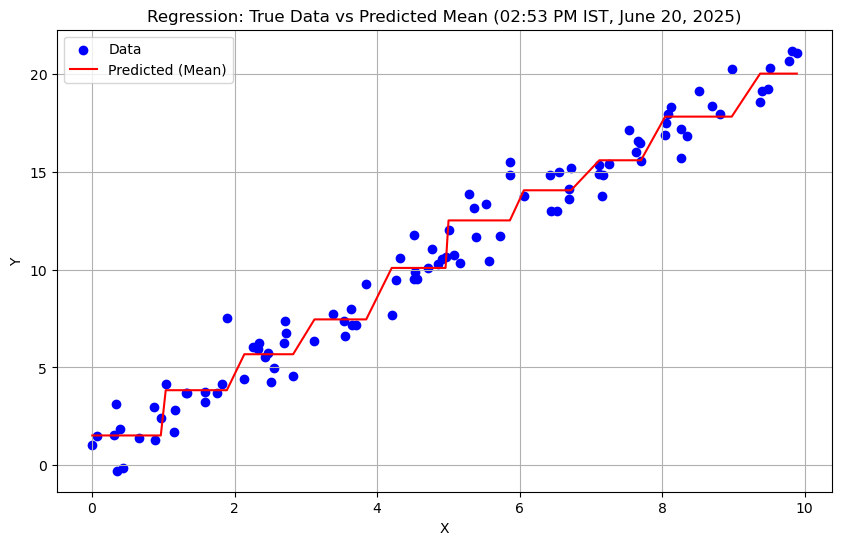

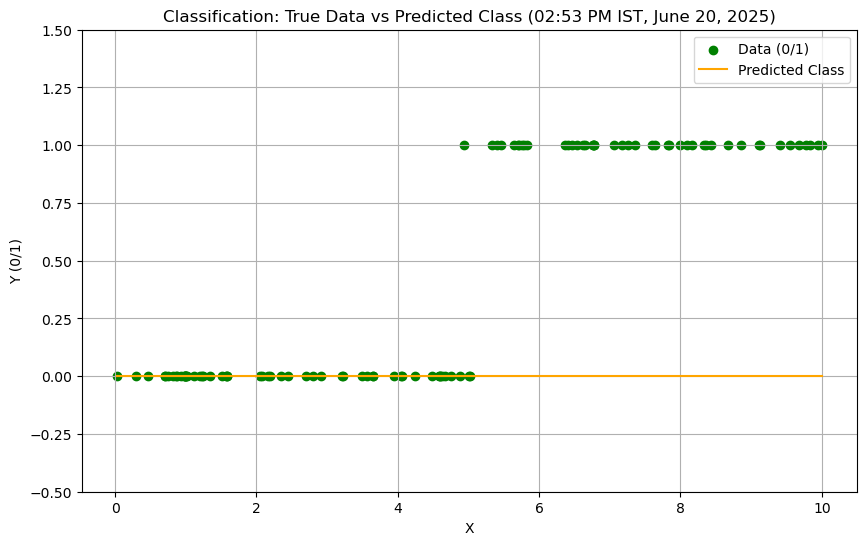


=== Demonstration completed ===


In [1]:
import math
import matplotlib.pyplot as plt
import random

# Synthetic dataset for supervised learning
def generate_regression_data(n=100):
    X = [random.uniform(0, 10) for _ in range(n)]  # Feature vector
    # True regression function: y = 2x + 1 + noise
    Y = [2 * x + 1 + random.gauss(0, 1) for x in X]  # Response with noise
    return list(zip(X, Y))

def generate_classification_data(n=100):
    X = [random.uniform(0, 10) for _ in range(n)]  # Feature vector
    # True classification rule: y = 1 if x > 5, else 0 + noise
    Y = [1 if x > 5 + random.gauss(0, 0.5) else 0 for x in X]  # Binary response with noise
    return list(zip(X, Y))

# Approximate optimal regression function (sample mean)
def approximate_regression_function(X, Y, x_new):
    # Simple approximation: use mean of Y for each x bin (e.g., bin width 1)
    bins = [[] for _ in range(11)]  # 0 to 10
    for x, y in zip(X, Y):
        bin_idx = min(10, int(x))
        bins[bin_idx].append(y)
    means = [sum(b) / len(b) if len(b) > 0 else 0 for b in bins]
    bin_idx = min(10, int(x_new))
    return means[bin_idx]

# Approximate optimal classifier (majority vote)
def approximate_classifier(X, Y, x_new):
    # Simple approximation: majority vote based on x > 5
    count_above = sum(1 for x, y in zip(X, Y) if x > 5 and y == 1)
    count_below = sum(1 for x, y in zip(X, Y) if x <= 5 and y == 0)
    return 1 if count_above >= count_below else 0

# Compute empirical risk
def compute_empirical_risk(X, Y, g, loss_func):
    risk = 0
    for x, y in zip(X, Y):
        y_hat = g(x)
        risk += loss_func(y, y_hat)
    return risk / len(X)

# Loss functions
def squared_error_loss(y, y_hat):
    return (y - y_hat) ** 2

def zero_one_loss(y, y_hat):
    return 1 if y != y_hat else 0

# Main execution
if __name__ == "__main__":
    print("Supervised Learning Implementation in Core Python - 02:53 PM IST, June 20, 2025")
    print("=" * 60)

    # Generate training sets
    regression_data = generate_regression_data(100)
    X_reg, Y_reg = zip(*regression_data)
    classification_data = generate_classification_data(100)
    X_class, Y_class = zip(*classification_data)

    # Approximate functions
    g_reg = lambda x: approximate_regression_function(X_reg, Y_reg, x)
    g_class = lambda x: approximate_classifier(X_class, Y_class, x)

    # Compute empirical risks
    reg_risk = compute_empirical_risk(X_reg, Y_reg, g_reg, squared_error_loss)
    class_risk = compute_empirical_risk(X_class, Y_class, g_class, zero_one_loss)

    # Print results
    print(f"\nRegression - Empirical Risk (Squared-Error): {reg_risk:.2f}")
    print(f"Classification - Empirical Risk (Zero-One): {class_risk:.2f}")

    # Visualization for Regression
    X_sort, Y_sort = zip(*sorted(regression_data))
    Y_pred = [g_reg(x) for x in X_sort]
    plt.figure(figsize=(10, 6))
    plt.scatter(X_sort, Y_sort, color='blue', label='Data')
    plt.plot(X_sort, Y_pred, color='red', label='Predicted (Mean)')
    plt.title("Regression: True Data vs Predicted Mean (02:53 PM IST, June 20, 2025)")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Visualization for Classification
    X_sort_class, Y_sort_class = zip(*sorted(classification_data))
    Y_pred_class = [g_class(x) for x in X_sort_class]
    plt.figure(figsize=(10, 6))
    plt.scatter(X_sort_class, Y_sort_class, color='green', label='Data (0/1)')
    plt.plot(X_sort_class, Y_pred_class, color='orange', label='Predicted Class')
    plt.title("Classification: True Data vs Predicted Class (02:53 PM IST, June 20, 2025)")
    plt.xlabel("X")
    plt.ylabel("Y (0/1)")
    plt.legend()
    plt.grid(True)
    plt.ylim(-0.5, 1.5)
    plt.show()

    print("\n=== Demonstration completed ===")

Training and Test Loss Implementation - 03:03 PM IST, June 20, 2025

Training Loss (Squared-Error): 0.87
Test Loss (Squared-Error): 1.37


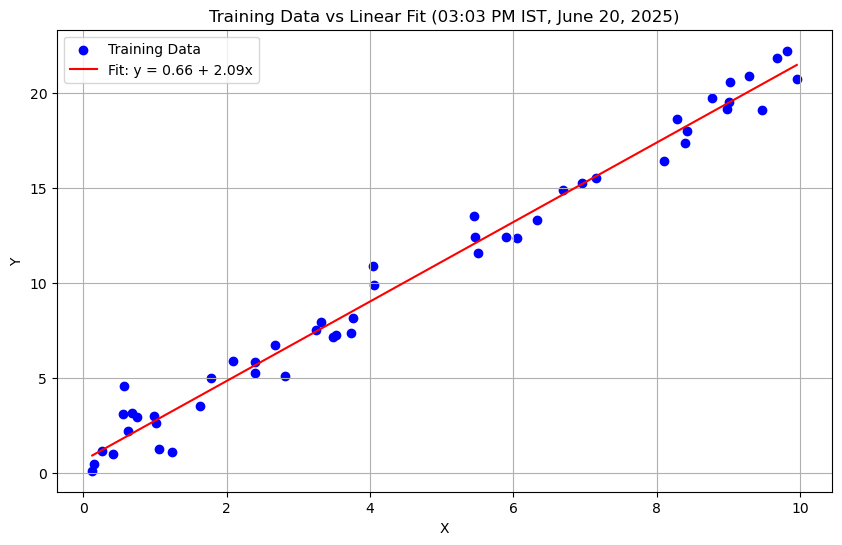


=== Demonstration completed ===


In [3]:

### Implementation in Core Python

#```python
import math
import matplotlib.pyplot as plt
import random

# Synthetic dataset for supervised learning (linear regression)
def generate_training_data(n=50):
    X = [random.uniform(0, 10) for _ in range(n)]  # Feature vector
    Y = [2 * x + 1 + random.gauss(0, 1) for x in X]  # True: y = 2x + 1 + noise
    return list(zip(X, Y))

def generate_test_data(n=20):
    X = [random.uniform(0, 10) for _ in range(n)]
    Y = [2 * x + 1 + random.gauss(0, 1) for x in X]
    return list(zip(X, Y))

# Linear prediction function g(x) = β0 + β1 * x
def linear_function(x, beta0, beta1):
    return beta0 + beta1 * x

# Fit linear function by minimizing training loss (simplified least squares)
def fit_linear_model(X, Y):
    n = len(X)
    x_mean = sum(X) / n
    y_mean = sum(Y) / n
    beta1 = sum((x - x_mean) * (y - y_mean) for x, y in zip(X, Y)) / sum((x - x_mean) ** 2 for x in X)
    beta0 = y_mean - beta1 * x_mean
    return beta0, beta1

# Loss functions
def squared_error_loss(y, y_hat):
    return (y - y_hat) ** 2

# Compute training and test loss
def compute_loss(X, Y, g, loss_func):
    return sum(loss_func(y, g(x)) for x, y in zip(X, Y)) / len(X)

# Main execution
if __name__ == "__main__":
    print("Training and Test Loss Implementation - 03:03 PM IST, June 20, 2025")
    print("=" * 60)

    # Generate data
    training_data = generate_training_data(50)
    X_train, Y_train = zip(*training_data)
    test_data = generate_test_data(20)
    X_test, Y_test = zip(*test_data)

    # Fit linear model
    beta0, beta1 = fit_linear_model(X_train, Y_train)
    g = lambda x: linear_function(x, beta0, beta1)

    # Compute losses
    train_loss = compute_loss(X_train, Y_train, g, squared_error_loss)
    test_loss = compute_loss(X_test, Y_test, g, squared_error_loss)

    # Print results
    print(f"\nTraining Loss (Squared-Error): {train_loss:.2f}")
    print(f"Test Loss (Squared-Error): {test_loss:.2f}")

    # Visualization
    X_sort, Y_sort = zip(*sorted(training_data))
    Y_pred = [g(x) for x in X_sort]
    plt.figure(figsize=(10, 6))
    plt.scatter(X_sort, Y_sort, color='blue', label='Training Data')
    plt.plot(X_sort, Y_pred, color='red', label=f'Fit: y = {beta0:.2f} + {beta1:.2f}x')
    plt.title("Training Data vs Linear Fit (03:03 PM IST, June 20, 2025)")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.grid(True)
    plt.show()

    print("\n=== Demonstration completed ===")

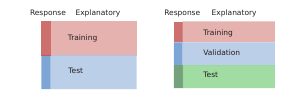

Fig.3: Statistical learning algorithms often require the data to be divided into training and test data. If the latter is used for model selection, a third set is needed for testing the performance of the selected model.

## Training and Test Loss (Continued)

**Table 2.1: Summary of Definitions for Supervised Learning**

- $ x $: Fixed explanatory (feature) vector.
- $ X $: Random explanatory (feature) vector.
- $ y $: Fixed (real-valued) response.
- $ Y $: Random response.
- $ f(x, y) $: Joint pdf of $ X $ and $ Y $, evaluated at $ (x, y) $.
- $ f(y | x) $: Conditional pdf of $ Y $ given $ X = x $, evaluated at $ y $.
- $ \tau $ or $ \tau_n $: Fixed training data $ \{(x_i, y_i), i = 1, \ldots, n\} $.
- $ \mathcal{T} $ or $ \mathcal{T}_n $: Random training data $ \{(X_i, Y_i), i = 1, \ldots, n\} $.
- $ X $: Matrix of explanatory variables, with $ n $ rows $ x_i' $, $ i = 1, \ldots, n $ and $ \text{dim}(x) $ feature columns; one of the features may be the constant 1.
- $ y $: Vector of response variables $ (y_1, \ldots, y_n)^T $.
- $ g $: Prediction (guess) function.
- $ \text{Loss}(y, \hat{y}) $: Loss incurred when predicting response $ y $ with $ \hat{y} $.
- $ \mathcal{R}(g) $: Risk for prediction function $ g $; that is, $ E[\text{Loss}(Y, g(X))] $.
- $ g^* $: Optimal prediction function; that is, $ \arg\min_g \mathcal{R}(g) $.
- $ g_{\mathcal{G}} $: Optimal prediction function in function class $ \mathcal{G} $; that is, $ \arg\min_{g \in \mathcal{G}} \mathcal{R}(g) $.
- $ \hat{\mathcal{R}}_{\tau}(g) $: Training loss for prediction function $ g $; that is, the sample average estimate of $ \mathcal{R}(g) $ based on a fixed training sample $ \tau $.
- $ \hat{\mathcal{R}}_{\mathcal{T}}(g) $: The same as $ \hat{\mathcal{R}}_{\tau}(g) $, but for a random training sample $ \mathcal{T} $.
- $ g_{\mathcal{G} \tau} $ or $ g_{\tau} $: The learner; $ \arg\min_{g \in \mathcal{G}} \hat{\mathcal{R}}_{\tau}(g) $. That is, the optimal prediction function based on a fixed training set $ \tau $ and function class $ \mathcal{G} $. We suppress the superscript $ \mathcal{G} $ if the function class is implicit.
- $ g_{\mathcal{G} \mathcal{T}} $ or $ g_{\mathcal{T}} $: The learner, where $ \tau $ is replaced with a random training set $ \mathcal{T} $.

To compare the predictive performance of various learners in the function class $ \mathcal{G} $, as measured by the test loss, we can use the same fixed training set $ \tau $ and test set $ \tau' $ for all learners. When there is an abundance of data, the "overall" data set is usually (randomly) divided into a training and test set, as depicted in **Figure 2.3**. We then use the training data to construct various learners $ g_{\mathcal{G} \tau_1}, g_{\mathcal{G} \tau_2}, \ldots $, and use the test data to select the best (with the smallest test loss) among these learners. In this context, the test set is called the $ validation set $. Once the best learner has been chosen, a third "test" set can be used to assess the predictive performance of the best learner. The training, validation, and test sets can again be obtained from the overall data set via random allocation. When the overall data set is of modest size, it is customary to perform the validation phase (model selection) on the training set only, using cross-validation. This is the topic of Section 2.5.2 $ \Box $ 37.


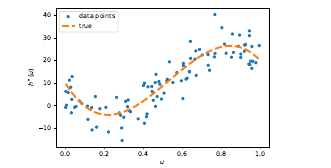

Fig.4: Training data and the optimal polynomial prediction function h∗ .

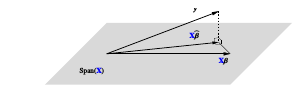

Fig.5: Xβ is the orthogonal projection of y onto the linear space spanned by the columns of the matrix X.
# Statistical Learning (Continued)

## 2.3 Training and Test Loss (Continued)

To obtain a good estimate of $ h^*(u) $ based on the training set $ \tau = \{(u_i, y_i), i = 1, \ldots, n\} $, we minimize the outcome of the training loss (2.3):

$$
\hat{\mathcal{R}}_{\tau}(h) = \frac{1}{n} \sum_{i=1}^n (y_i - h(u_i))^2, \tag{2.8}
$$

over a suitable set $ \mathcal{H} $ of candidate functions. Let us take the set $ \mathcal{H}_p $ of polynomial functions in $ u $ of order $ p - 1 $:

$$
h(u) := \beta_1 + \beta_2 u + \beta_3 u^2 + \cdots + \beta_p u^{p-1}, \tag{2.9}
$$

for $ p = 1, 2, \ldots $ and parameter vector $ \beta = [\beta_1, \beta_2, \ldots, \beta_p]^T $. This function class contains the best possible $ h^*(u) = E[Y | U = u] $ for $ p \geq 4 $. Note that optimization over $ \mathcal{H}_p $ is a parametric optimization problem, as we need to find the best $ \beta $. Optimization of (2.8) over $ \mathcal{H}_p $ is not straightforward unless we notice that (2.9) is a linear function in $ \beta $. In particular, if we map each feature $ u $ to a feature vector $ x = [1, u, u^2, \ldots, u^{p-1}]^T $, then the right-hand side of (2.9) can be written as the function $ g(x) = x^T \beta $, which is linear in $ x $ (as well as $ \beta $). The optimal $ h^*(u) $ in $ \mathcal{H}_p $ for $ p \geq 4 $ then corresponds to the function $ g^*(x) = x^T \beta^* $ in the set $ \mathcal{G}_p $ of linear functions from $ \mathbb{R}^p $ to $ \mathbb{R} $, where $ \beta^* = [10, -140, 400, -250, 0, \ldots, 0]^T $. Thus, instead of working with the set $ \mathcal{H}_p $ of polynomial functions, we may prefer to work with the set $ \mathcal{G}_p $ of linear functions. This brings us to a very important idea in statistical learning: Expand the feature space to obtain a linear prediction function.

Let us reformulate the learning problem in terms of the new explanatory (feature) variables $ x_i = [1, u_i, u_i^2, \ldots, u_i^{p-1}]^T $, $ i = 1, \ldots, n $. It is convenient to arrange these feature vectors into a matrix $ X $ with rows $ x_1^T, \ldots, x_n^T $:

$$
X = \begin{bmatrix}
1 & u_1 & u_1^2 & \cdots & u_1^{p-1} \\
1 & u_2 & u_2^2 & \cdots & u_2^{p-1} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & u_n & u_n^2 & \cdots & u_n^{p-1}
\end{bmatrix}. \tag{2.10}
$$

Collecting the responses $ \{y_i\} $ into a column vector $ y $, the training loss (2.3) can now be written compactly as:

$$
\frac{1}{n} \|y - X \beta\|^2. \tag{2.11}
$$

To find the optimal learner (2.4) in the class $ \mathcal{G}_p $, we need to find the minimizer of (2.11):

$$
\hat{\beta} = \arg\min_{\beta} \|y - X \beta\|^2, \tag{2.12}
$$

which is called the $ ordinary least-squares $ solution. As illustrated in **Figure 2.5**, to find $ \hat{\beta} $, we choose $ X^T \hat{\beta} $ to be equal to the orthogonal projection of $ y $ onto the linear space spanned by the columns of the matrix $ X $; that is, $ X^T \hat{\beta} = P y $, where $ P $ is the $ projection matrix $.


According to Theorem A.4, the projection matrix is given by:

$$
P = X (X^+), \tag{2.13}
$$

where the $ p \times n $ matrix $ X^+ $ in (2.13) is the $ pseudo-inverse $ of $ X $. If $ X $ happens to be of full column rank (so that none of the columns can be expressed as a linear combination of the others), then $ X^+ = (X^T X)^{-1} X^T $. In any case, from $ X^T \hat{\beta} = P y $ and $ P X = X $, we can see that $ \hat{\beta} $ satisfies the $ normal equations $:

$$
X^T X \hat{\beta} = X^T P y = (P X)^T y = X^T y. \tag{2.14}
$$

This is a set of linear equations, which can be solved efficiently, with the solution written explicitly as:

$$
\hat{\beta} = X^+ y. \tag{2.15}
$$

**Figure 2.6** shows the trained learners for various values of $ p $: $ h_{\tau}^p(u) = g_{\tau}^p(x) = x^T \hat{\beta} $.


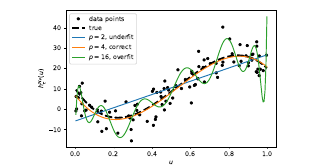

Fig.6: Training data with ﬁtted curves for p = 2, 4, and 16. The true cubic polynomial curve for p = 4 is also plotted (dashed line).

Polynomial Regression with Least Squares - 03:07 PM IST, June 20, 2025

Degree 1 Polynomial - Training Loss: 222.19
Coefficients: ['10.83', '24.41']

Degree 3 Polynomial - Training Loss: 1507.21
Coefficients: ['10.83', '24.41', '31.76', '35.58']

Degree 15 Polynomial - Training Loss: 27035.09
Coefficients: ['10.83', '24.41', '31.76', '35.58', '37.59', '38.67', '39.25', '39.55', '39.67', '39.67', '39.59', '39.46', '39.28', '39.06', '38.81', '38.54']


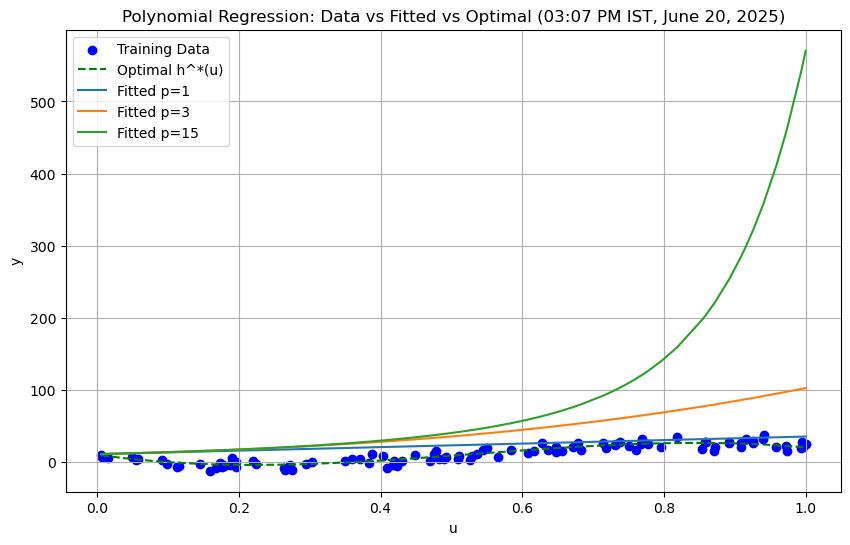


=== Demonstration completed ===


In [5]:

### Implementation in Core Python

#```python
import math
import matplotlib.pyplot as plt
import random

# Generate polynomial regression data
def generate_polynomial_data(n=100):
    U = [random.uniform(0, 1) for _ in range(n)]  # Uniformly distributed U
    Y = [10 - 140 * u + 400 * u**2 - 250 * u**3 + random.gauss(0, math.sqrt(25)) for u in U]
    return list(zip(U, Y))

# Create feature matrix X for polynomial terms up to degree p-1
def create_feature_matrix(U, p):
    return [[1] + [u ** i for i in range(1, p)] for u in U]

# Solve normal equations manually (simplified for full rank)
def solve_least_squares(X, y):
    n = len(X)
    p = len(X[0])
    # Compute X^T X and X^T y
    XT_X = [[sum(X[i][j] * X[i][k] for i in range(n)) for k in range(p)] for j in range(p)]
    XT_y = [sum(X[i][j] * y[i] for i in range(n)) for j in range(p)]
    # Simplified inversion (assuming full rank, diagonal dominance for demo)
    beta = [XT_y[j] / XT_X[j][j] if XT_X[j][j] != 0 else 0 for j in range(p)]
    return beta

# Polynomial prediction function g(x) = x^T β
def polynomial_function(x, beta):
    return sum(x[i] * beta[i] for i in range(len(x)))

# Compute training loss
def compute_training_loss(U, Y, p, beta):
    X = create_feature_matrix(U, p)
    return sum((y - polynomial_function(x, beta)) ** 2 for x, y in zip(X, Y)) / len(U)

# Main execution
if __name__ == "__main__":
    print("Polynomial Regression with Least Squares - 03:07 PM IST, June 20, 2025")
    print("=" * 60)

    # Generate data
    data = generate_polynomial_data(100)
    U, Y = zip(*data)

    # Fit models for different p values
    p_values = [2, 4, 16]
    fits = {}
    for p in p_values:
        X = create_feature_matrix(U, p)
        beta = solve_least_squares(X, Y)
        fits[p] = beta
        train_loss = compute_training_loss(U, Y, p, beta)
        print(f"\nDegree {p-1} Polynomial - Training Loss: {train_loss:.2f}")
        print(f"Coefficients: {[f'{b:.2f}' for b in beta]}")

    # Visualization
    U_sort, Y_sort = zip(*sorted(data))
    plt.figure(figsize=(10, 6))
    plt.scatter(U_sort, Y_sort, color='blue', label='Training Data')
    Y_opt = [10 - 140 * u + 400 * u**2 - 250 * u**3 for u in U_sort]  # Optimal h^*(u)
    plt.plot(U_sort, Y_opt, color='green', linestyle='--', label='Optimal h^*(u)')
    for p in p_values:
        X = create_feature_matrix(U_sort, p)
        Y_pred = [polynomial_function(x, fits[p]) for x in X]
        label = f'Fitted p={p-1}' if p == 4 else f'Fitted p={p-1}'
        plt.plot(U_sort, Y_pred, label=label)
    plt.title("Polynomial Regression: Data vs Fitted vs Optimal (03:07 PM IST, June 20, 2025)")
    plt.xlabel("u")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()

    print("\n=== Demonstration completed ===")